# Dataset1 Housing Price Prediction

## Import Required Packages

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns # boxplot, histplot
import matplotlib.pyplot as plt # plot

from sklearn.feature_selection import SelectPercentile # Feature Selection
from sklearn.feature_selection import f_regression # for linear regression

from sklearn import preprocessing # Scaling IV Normalisition
from sklearn.preprocessing import StandardScaler # Scaling IV Standardising


from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn import linear_model # Linear Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor # Random Forest Regression

from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import r2_score # R^2


## Load Data

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [2]:
#Load Data In Pandas
df = pd.read_csv('kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Data Preprocess
### Drop some useless Data

In [3]:
# Drop some useless columns(Don't drop twice)
df = df.drop(['id','date'], axis=1)
#df.info()

### Drop rows with missing values

In [4]:
# Drop rows with missing values NaN
df.dropna()
df.info() # there is no change at this stage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

### Detect Duplicated Rows and Drop Duplicates

In [5]:
df.duplicated(subset=['zipcode','lat','long'],keep=False)
df1=df.drop_duplicates(subset=['zipcode','lat','long'],keep=False)
df1.info()
#df1.duplicated(subset=['zipcode','lat','long'],keep=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20109 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20109 non-null  float64
 1   bedrooms       20109 non-null  int64  
 2   bathrooms      20109 non-null  float64
 3   sqft_living    20109 non-null  int64  
 4   sqft_lot       20109 non-null  int64  
 5   floors         20109 non-null  float64
 6   waterfront     20109 non-null  int64  
 7   view           20109 non-null  int64  
 8   condition      20109 non-null  int64  
 9   grade          20109 non-null  int64  
 10  sqft_above     20109 non-null  int64  
 11  sqft_basement  20109 non-null  int64  
 12  yr_built       20109 non-null  int64  
 13  yr_renovated   20109 non-null  int64  
 14  zipcode        20109 non-null  int64  
 15  lat            20109 non-null  float64
 16  long           20109 non-null  float64
 17  sqft_living15  20109 non-null  int64  
 18  sqft_l

### Validate Data
#### Minimum coefficient of variation: 0.001
#### Maximum percentage of cases in a single category: 95%
#### Drop Columns fail any of above checks

In [6]:
# define function to calculate coefficient of variation(cv)
# cv = std/mean
# if cv<0.001 drop the corresponding column
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100
df1.apply(cv)

price              68.462694
bedrooms           27.467604
bathrooms          36.484503
sqft_living        44.081156
sqft_lot          271.767707
floors             35.629393
waterfront       1123.736765
view              321.032246
condition          19.095773
grade              15.467991
sqft_above         46.367620
sqft_basement     149.994192
yr_built            1.475960
yr_renovated      469.153465
zipcode             0.054737
lat                 0.292956
long               -0.115488
sqft_living15      34.443169
sqft_lot15        212.726070
dtype: float64

In [7]:
# Maximum percentage of cases in a sinlge category 95%
def constant_0_rate(dataframe, attribute):
    return (dataframe[attribute]==0).sum()/len(dataframe[attribute])
    
waterfront = constant_0_rate(df1, 'waterfront')
view =constant_0_rate(df1, 'view')
yr_renovated = constant_0_rate(df1, 'yr_renovated')
print('Constant 0 rate in column waterfront is: ', waterfront)
print('Constant 0 rate in column view is: ', view)
print('Constant 0 rate in column yr_renovated is: ', yr_renovated)

Constant 0 rate in column waterfront is:  0.9921428216221593
Constant 0 rate in column view is:  0.8983539708588194
Constant 0 rate in column yr_renovated is:  0.9565368740365011


In [8]:
# Drop columns whose constant 0 rate > 95% (Don't drop twice)
df1 = df1.drop(['waterfront','yr_renovated'], axis=1)
#df1.info()

### Detect Outliers

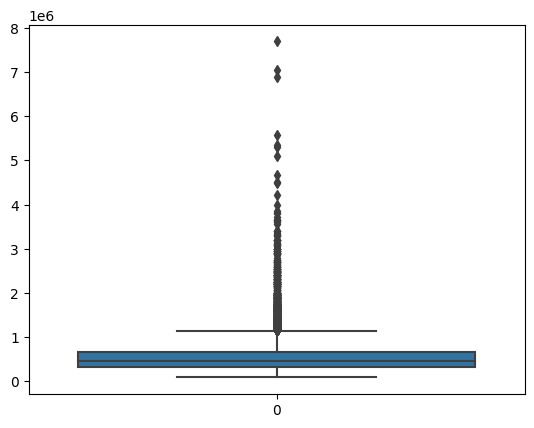

In [9]:
# Detect Outliers Boxplot 
sns.boxplot(data=df1.values[:, 0]) # Detect the outliers of target variable price
plt.show()

### Transfer target y (price) to ln(y) (ln_price_) 

(20109, 16)
(20109,)


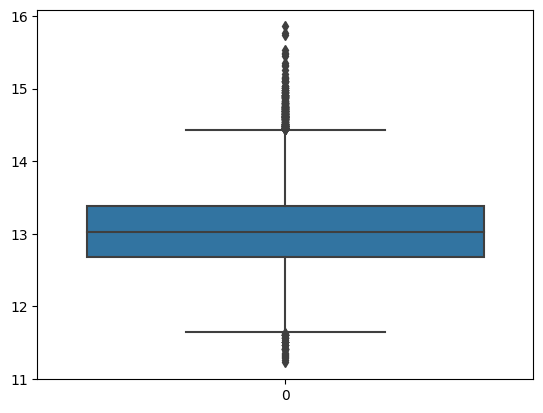

<AxesSubplot: ylabel='Density'>

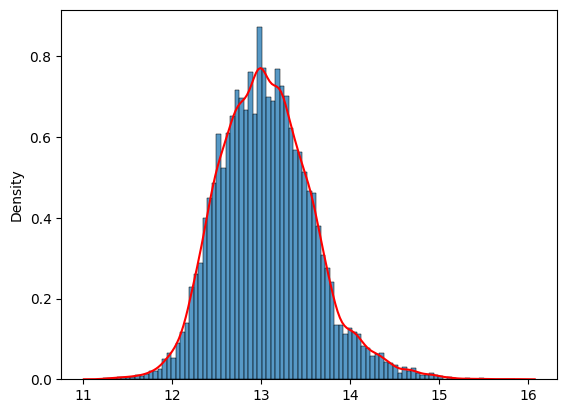

In [10]:
# X represent the independent variables
# y represent the dependent varibale: price
X = df1.values[:, 1:]
# Transfer price to ln_price, which is the natural logarithm of price
y = np.log(df1.values[:, 0])
print(X.shape)
print(y.shape)
sns.boxplot(data=y)
#plt.savefig('data1_box_lnPrice')
plt.show()
#kde stands for kernel density estimate
ax = sns.histplot(data=y, kde=False, stat='density')
sns.kdeplot(data=y, color='red', ax=ax)
#plt.savefig('data1_hist_lnPrice')

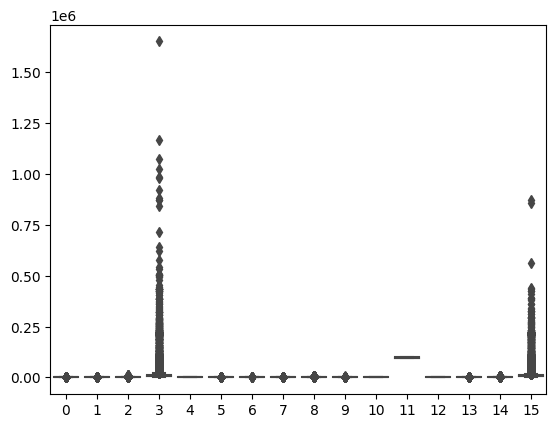

In [11]:
sns.boxplot(data=X)
plt.show()

### Feature Selection

In [12]:
# Features Selection
# Source Code From Lecture's Slides Week3_Feature Selection
# Univariate Feature Selection
selector = SelectPercentile(f_regression, percentile=16)
selector.fit(X,y)

for n,s in zip(list(df1.columns.values[1:]),selector.scores_):
    print("Score: ",s," for feature ",n)


Score:  2731.906698705656  for feature  bedrooms
Score:  9055.369604514532  for feature  bathrooms
Score:  19348.618419752016  for feature  sqft_living
Score:  196.37072684493097  for feature  sqft_lot
Score:  2330.9305686704515  for feature  floors
Score:  2829.366419249301  for feature  view
Score:  23.00224087621299  for feature  condition
Score:  20093.30406708801  for feature  grade
Score:  11577.105818474705  for feature  sqft_above
Score:  2295.5613911692094  for feature  sqft_basement
Score:  138.67973638532726  for feature  yr_built
Score:  23.03771922455862  for feature  zipcode
Score:  5185.635452261934  for feature  lat
Score:  45.177666975199216  for feature  long
Score:  12810.57942702074  for feature  sqft_living15
Score:  164.9491202229784  for feature  sqft_lot15


In [13]:
# Drop columns with smaller f_regression score (Don't drop twice)
df1 = df1.drop(['sqft_lot','condition','yr_built','zipcode','long'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20109 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20109 non-null  float64
 1   bedrooms       20109 non-null  int64  
 2   bathrooms      20109 non-null  float64
 3   sqft_living    20109 non-null  int64  
 4   floors         20109 non-null  float64
 5   view           20109 non-null  int64  
 6   grade          20109 non-null  int64  
 7   sqft_above     20109 non-null  int64  
 8   sqft_basement  20109 non-null  int64  
 9   lat            20109 non-null  float64
 10  sqft_living15  20109 non-null  int64  
 11  sqft_lot15     20109 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 2.0 MB


### Scaling Dataset Independent Variables (IVs)

[[0.09090909 0.125      0.06716981 ... 0.21760797 0.16193426 0.00573322]
 [0.09090909 0.28125    0.17207547 ... 0.16611296 0.22216486 0.008018  ]
 [0.06060606 0.125      0.03622642 ... 0.23754153 0.3994149  0.00850391]
 ...
 [0.12121212 0.3125     0.15245283 ... 0.13039867 0.2462571  0.00751372]
 [0.06060606 0.09375    0.05509434 ... 0.18272425 0.10686629 0.00154846]
 [0.06060606 0.09375    0.05509434 ... 0.18272425 0.10686629 0.0008018 ]]


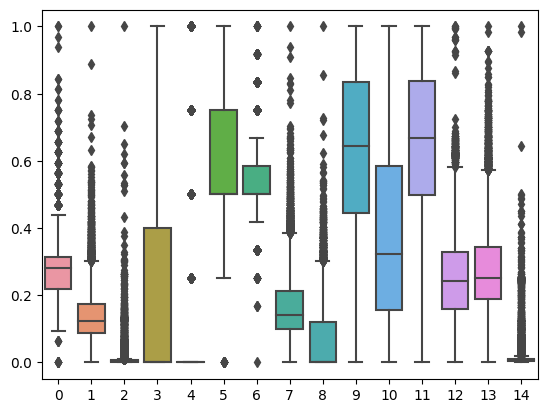

In [14]:
# Scaling Dataset Independent Variables
# Normalisation
scalingObj1 = preprocessing.MinMaxScaler()
array_scaled1 = scalingObj1.fit_transform(X)
print(array_scaled1)

sns.boxplot(data=pd.DataFrame(array_scaled1[:,1:]))
plt.show()

[[-0.41579471 -1.44864948 -0.99593013 ... -0.31845196 -0.96096126
  -0.2693625 ]
 [-0.41579471  0.16673599  0.50323118 ... -0.75774297 -0.45360643
  -0.19869586]
 [-1.49077746 -1.44864948 -1.43812879 ... -0.14840383  1.03946637
  -0.1836672 ]
 ...
 [ 0.65918804  0.48981309  0.22281252 ... -1.06241254 -0.25066449
  -0.21429297]
 [-1.49077746 -1.77172658 -1.16849546 ... -0.61603619 -1.42482854
  -0.39879366]
 [-1.49077746 -1.77172658 -1.16849546 ... -0.61603619 -1.42482854
  -0.42188733]]


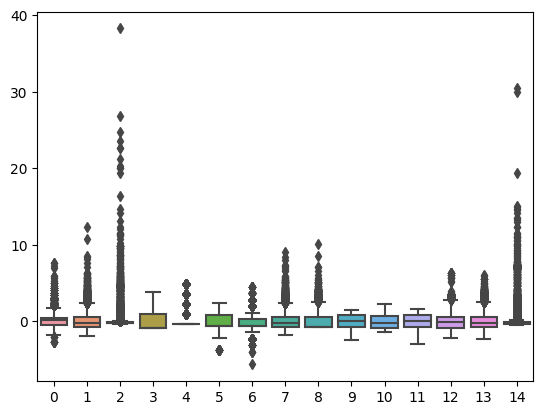

In [15]:
# Scaling Dataset Independent Variables
# Standardizing

scalingObj2= StandardScaler()
array_scaled2=scalingObj2.fit_transform(X)
print(array_scaled2)

sns.boxplot(data=pd.DataFrame(array_scaled2[:,1:]))
plt.show()

## Build Models
### Split Dataset into Training and Test Sets
### Train Data in Training set using Linear Regression Model
#### Original Trainning Dataset: X_train, y_train
#### Normalised Training Dataset: X_train1, y_train1
#### Standardised Traing Dataset: X_train2, y_train2
### Evaluation the prediction result with different matrics

In [16]:
# 4.2.1 Original Trainning Dataset: X_train, y_train
# Source Code Originaly from Lecture's Lab, Modified by Jia Lin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Training IV shape: ",X_train.shape) # Independent Variable
print("Training DV shape: ", y_train.shape) # Dependent Variable
print("Test IV shape: ", X_test.shape)
print("Test DV shape: ", y_test.shape)
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

# Evaluation:
#print("\nEvaluation Original Dataset (without Scaling):")
accuracy = regression.score(X_test, y_test)
#print("Accuracy: ",round(accuracy,3))
mse = mean_squared_error(y_test, y_pred)# Mean Squared Error
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
#print("MSE: ", round(mse, 3))
#print("RMSE: ", round(rmse, 3))
#print("MAE: ", round(mae, 3))
r_sqr = r2_score(y_test, y_pred) # R_squared and Adjusted R_squared
adjusted_r_sqr = 1-(1-r_sqr)*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))
#print("R^2: ", round(r_sqr, 3))
#print("Adjusted R^2: ", round(adjusted_r_sqr, 3))
original = [accuracy, mse, rmse, mae, r_sqr, adjusted_r_sqr]

Training IV shape:  (16087, 16)
Training DV shape:  (16087,)
Test IV shape:  (4022, 16)
Test DV shape:  (4022,)


In [17]:
# 4.2.2 Normalised Training Dataset: X_train1, y_train1
X_train1, X_test1, y_train1, y_test1 = train_test_split(array_scaled1, y, test_size=0.2, random_state=0)
print("Training IV shape: ",X_train1.shape) # Independent Variable
print("Training DV shape: ", y_train1.shape) # Dependent Variable
print("Test IV shape: ", X_test1.shape)
print("Test DV shape: ", y_test1.shape)
regression = linear_model.LinearRegression()
regression.fit(X_train1, y_train1)

y_pred1 = regression.predict(X_test1)

# Evaluation:
#print("\nEvaluation Normalised Data:")
accuracy1 = regression.score(X_test1, y_test1)
#print("Accuracy: ",round(accuracy1,3))
mse1 = mean_squared_error(y_test1, y_pred1)# Mean Squared Error
rmse1 = np.sqrt(mse1)
mae1 = mean_absolute_error(y_test1, y_pred1) # Mean Absolute Error
#print("MSE: ", round(mse1, 3))
#print("RMSE: ", round(rmse1, 3))
#print("MAE: ", round(mae1, 3))
r_sqr1 = r2_score(y_test1, y_pred1) # R_squared and Adjusted R_squared
adjusted_r_sqr1 = 1-(1-r_sqr)*((len(X_test1)-1)/(len(X_test1)-len(X_test1[0])-1))
#print("R^2: ", round(r_sqr1, 3))
#print("Adjusted R^2: ", round(adjusted_r_sqr1, 3))
normalised = [accuracy1, mse1, rmse1, mae1, r_sqr1, adjusted_r_sqr1]

Training IV shape:  (16087, 16)
Training DV shape:  (16087,)
Test IV shape:  (4022, 16)
Test DV shape:  (4022,)


In [18]:
# 4.2.3 Standardised Training Dataset: X_train2, y_train2
X_train2, X_test2, y_train2, y_test2 = train_test_split(array_scaled2, y, test_size=0.2, random_state=0)
print("Training IV shape: ",X_train2.shape) # Independent Variable
print("Training DV shape: ", y_train2.shape) # Dependent Variable
print("Test IV shape: ", X_test2.shape)
print("Test DV shape: ", y_test2.shape)
regression = linear_model.LinearRegression()
regression.fit(X_train2, y_train2)
y_pred2 = regression.predict(X_test2)

# Evaluation:
#print("\nEvaluation Standardised Data:")
accuracy2 = regression.score(X_test2, y_test2)
#print("Accuracy: ",round(accuracy1,3))
mse2 = mean_squared_error(y_test2, y_pred2)# Mean Squared Error
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(y_test2, y_pred2) # Mean Absolute Error
#print("MSE: ", round(mse2, 3))
#print("RMSE: ", round(rmse2, 3))
#print("MAE: ", round(mae2, 3))
r_sqr2 = r2_score(y_test2, y_pred2) # R_squared and Adjusted R_squared
adjusted_r_sqr2 = 1-(1-r_sqr2)*((len(X_test2)-1)/(len(X_test2)-len(X_test2[0])-1))
#print("R^2: ", round(r_sqr2, 3))
#print("Adjusted R^2: ", round(adjusted_r_sqr2, 3))
standardised = [accuracy2, mse2, rmse2, mae2, r_sqr2, adjusted_r_sqr2]
model_LR = standardised

Training IV shape:  (16087, 16)
Training DV shape:  (16087,)
Test IV shape:  (4022, 16)
Test DV shape:  (4022,)


### Compare 3 Training Results

In [19]:
evaluation_data = {'Original' : original, 
                   'Normalised' : normalised, 
                   'Standardised' : standardised}
index_labels = ['Accuracy', 'MSE', 'RMSE', 'MAE', 'R^2', 'Adjusted R^2']
evaluation_df = pd.DataFrame(evaluation_data, index = index_labels)
print(evaluation_df)

              Original  Normalised  Standardised
Accuracy      0.765705    0.765727      0.765766
MSE           0.066969    0.066963      0.066952
RMSE          0.258784    0.258772      0.258750
MAE           0.200080    0.200093      0.200053
R^2           0.765705    0.765727      0.765766
Adjusted R^2  0.764769    0.764769      0.764831


### Linear Regression Model Coefficients and Intercept

In [20]:
# Linear Regression Model coefficients and intercept:
print("\nRegression Model coefficients and intercept:")
coefficients = pd.DataFrame(zip(list(df1.columns.values[1:]), np.around(regression.coef_,3)))
coefficients.columns = ['IV Name','Coefficients']
print(coefficients)
print("Intercept: ", round(regression.intercept_,3))


Regression Model coefficients and intercept:
          IV Name  Coefficients
0        bedrooms -1.500000e-02
1       bathrooms  6.100000e-02
2     sqft_living  7.520620e+11
3          floors  1.800000e-02
4            view  3.900000e-02
5           grade  6.100000e-02
6      sqft_above  3.600000e-02
7   sqft_basement  1.900000e-01
8             lat -6.786236e+11
9   sqft_living15 -3.637551e+11
10     sqft_lot15 -1.060000e-01
Intercept:  13.054


### Train Data in Training set using Decision Tree Regression Model
### Train Data in Training set using Random Forest Regression Model
### Evaluaiton Prediction Result: Accuracy, MSE, RMSE, MAE, R^2, Adjusted_R^2

In [21]:
# score for a decision tree regression model 
reg_DT = DecisionTreeRegressor()
reg_DT = reg_DT.fit(X_train2, y_train2)
y_pred2_DT = reg_DT.predict(X_test2)
accuracy_DT = reg_DT.score(X_test2, y_test2)
mse_DT = mean_squared_error(y_test2, y_pred2_DT)# Mean Squared Error
rmse_DT = np.sqrt(mse_DT)
mae_DT = mean_absolute_error(y_test2, y_pred2_DT) # Mean Absolute Error
r_sqr_DT = r2_score(y_test2, y_pred2_DT) # R_squared and Adjusted R_squared
adjusted_r_sqr_DT = 1-(1-r_sqr_DT)*((len(X_test2)-1)/(len(X_test2)-len(X_test2[0])-1))
model_DT = [accuracy_DT, mse_DT, rmse_DT, mae_DT, r_sqr_DT, adjusted_r_sqr_DT]
#print(model_DT)

# score for a random forest regression model
reg_RF = RandomForestRegressor()
reg_RF = reg_RF.fit(X_train2, y_train2)
y_pred2_RF = reg_RF.predict(X_test2)
accuracy_RF = reg_RF.score(X_test2, y_test2)
mse_RF = mean_squared_error(y_test2, y_pred2_RF)# Mean Squared Error
rmse_RF = np.sqrt(mse_RF)
mae_RF = mean_absolute_error(y_test2, y_pred2_RF) # Mean Absolute Error
r_sqr_RF = r2_score(y_test2, y_pred2_RF) # R_squared and Adjusted R_squared
adjusted_r_sqr_RF = 1-(1-r_sqr_RF)*((len(X_test2)-1)/(len(X_test2)-len(X_test2[0])-1))
model_RF = [accuracy_RF, mse_RF, rmse_RF, mae_RF, r_sqr_RF, adjusted_r_sqr_RF]


### Compare Evaluation of Different Model

In [22]:
evaluation_models = {'linear' : model_LR, 
                     'DecisionTree' : model_DT,
                     'RandomForest' : model_RF}
evaluation_models_df = pd.DataFrame(evaluation_models, index = index_labels)
print(evaluation_models_df)

                linear  DecisionTree  RandomForest
Accuracy      0.765766      0.776085      0.882892
MSE           0.066952      0.064002      0.033473
RMSE          0.258750      0.252987      0.182957
MAE           0.200053      0.181223      0.128985
R^2           0.765766      0.776085      0.882892
Adjusted R^2  0.764831      0.775190      0.882425


### Plot Prediction Value Vs. Residuals of Three Models

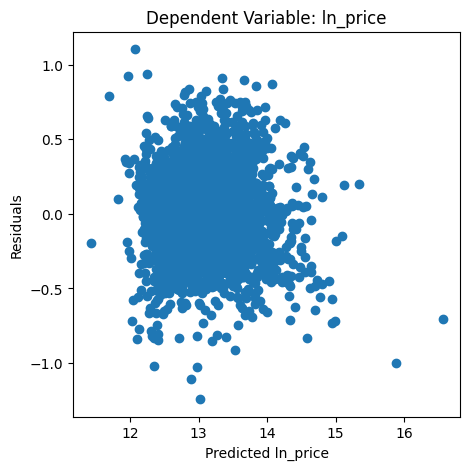

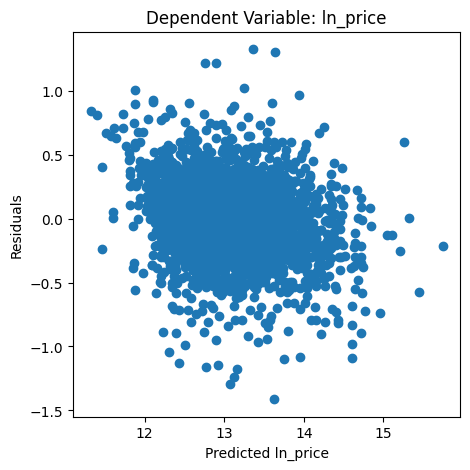

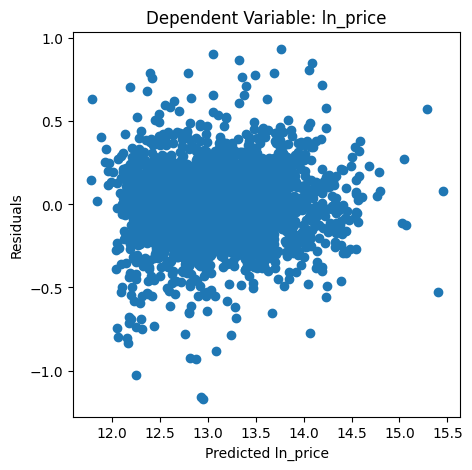

In [23]:
def residVsPred(pred_Model):
    plt.figure(figsize=(5,5))
    residuals = y_test2-pred_Model
    plt.scatter(pred_Model, residuals)
    plt.title('Dependent Variable: ln_price')
    plt.xlabel('Predicted ln_price')
    plt.ylabel('Residuals')
    plt.show()
    
residVsPred(y_pred2)
#plt.savefig('data1_pred_vs_resi_LR')
residVsPred(y_pred2_DT)
#plt.savefig('data1_pred_vs_resi_DT')
residVsPred(y_pred2_RF)
#plt.savefig('data1_pred_vs_resi_RF')


### Residuals Histogram of Three Models

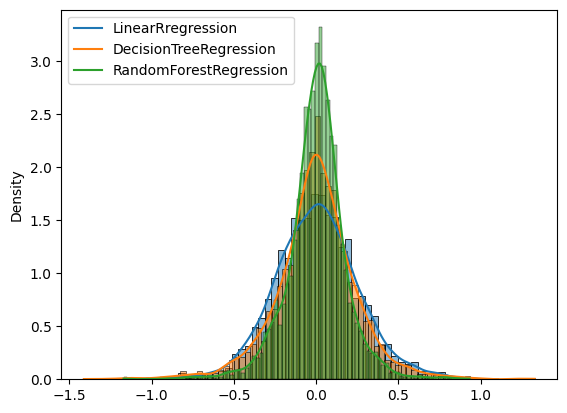

In [24]:
def residHist(residuals):
    ax = sns.histplot(data=residuals, kde=True, stat='density')
    plt.legend(labels=['LinearRregression','DecisionTreeRegression','RandomForestRegression'])

resid_LR = y_test2-y_pred2
resid_DT = y_test2-y_pred2_DT
resid_RF = y_test2-y_pred2_RF

residHist(resid_LR)
residHist(resid_DT)
residHist(resid_RF)
#plt.savefig('data1_hist_residuals')

### Plot Test Value Vs. Prediction Value

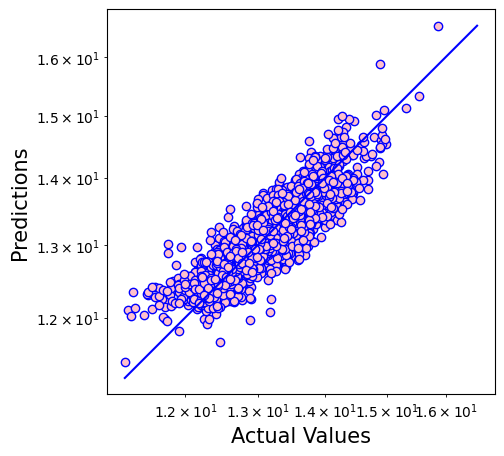

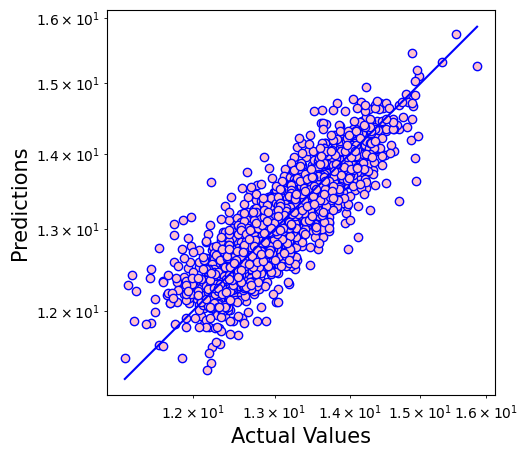

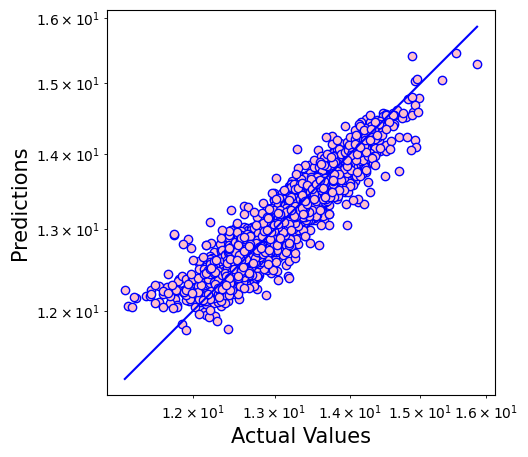

In [25]:
# Source Code: https://stackoverflow.com/questions/58410187/how-to-plot-predicted-values-vs-the-true-value
# Modified by JiaLin
def realVsPred(pred_Model):
    plt.figure(figsize=(5,5))
    plt.scatter(y_test2, pred_Model, c='pink', edgecolor='blue')
    plt.yscale('log')
    plt.xscale('log')
    p1 = max(max(pred_Model), max(y_test2))
    p2 = min(min(pred_Model), min(y_test2))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Actual Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
    
realVsPred(y_pred2)
#plt.savefig('data1_real_vs_pred_LR')
realVsPred(y_pred2_DT)
#plt.savefig('data1_real_vs_pred_DT')
realVsPred(y_pred2_RF)
#plt.savefig('data1_real_vs_pred_RF')
